<a href="https://colab.research.google.com/github/RafagaBlanca/bioinspired-algos/blob/main/AlgoritmoGeneticoReal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**implementación de un algoritmo genético simple para representación real**

28.804735646383143
[0, 0] [20, 20] 30


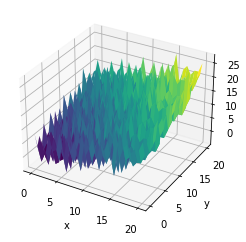

In [ ]:
#funciones de prueba
import math
import numpy as np
import matplotlib.pyplot as plt

def fun1(x1, x2):
	#Maximize
	#ranges x1 = [ 0, 20] x2 = [0, 20]
	#optimal value x* = 17.5439, 17.5439 f(x*) = 28.804736
	return (x1 + 5*np.sin(3*x1) + 8*np.cos(5*x1) + x2 + 5*np.sin(3*x2) + 8*np.cos(5*x2))/2


def plotFunction(limInf, limSup, n):
  print(limInf, limSup, n)
  x1 = np.linspace(limInf[0], limSup[0], n)
  x2 = np.linspace(limInf[1], limSup[1], n)
  X, Y = np.meshgrid(x1, x2)
  FX = fun1(X, Y)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  #ax.contour3D(X, Y, FX, 50, cmap='binary')
  ax.plot_surface(X, Y, FX, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')



if __name__ == "__main__":
  #evalua valores en las funciones de prueba
  print(fun1(17.5439, 17.5439))

  #grafica la función de prueba
  plotFunction([0,0], [20,20], 30)



**Estructura básica de un algoritmo genético**

In [ ]:
import random
from operator import itemgetter
from statistics import mean
import matplotlib.pyplot as plt

def poblacionInicial(tam, numVar, limInf, limSup):
  poblacion = []
  for i in range(0, tam):
    X = []
    for j in range(0, numVar):
      X.append(random.uniform(limInf[j], limSup[j]))

    fx = calculaAptitud(X)
    poblacion.append([X, fx])
  return poblacion

def calculaAptitud(X):
  return fun1(X[0], X[1])

# cambiar por torneo binario o ruleta
def defineParejas(tamPop):
  indices = list(range(0, tamPop))
  random.shuffle(indices)
  print(indices)
  return indices

#cruza simple de 1 punto
def cruza(p1, p2):
  h1 = [p1[0], p2[1]]
  h2 = [p2[0], p1[1]]
  return h1, h2

#crea poblacion de descendientes
def creaHijos(pCruza, indices, padres, tamPob):
  hijos = []
  j = 0
  while j < tamPob:
    if random.uniform(0,1) <= pCruza:
      p1 = padres[indices[j]][0]
      p2 = padres[indices[j+1]][0]
      #print("padre1",p1)
      #print("padre2",p2)
      h1, h2 = cruza(p1, p2)
      #print("hijo1", h1)
      #print("hijo2", h2)
      hijos.append(h1)
      hijos.append(h2)
    j += 2
  return hijos


def mutacion(cromosoma, delta, porcMuta):
  nuevo_crom =[]
  for gen in cromosoma:
    if random.uniform(0,1) <= porcMuta:
      if random.uniform(0,1) <= 0.5:
        gen += delta
      else:
        gen -= delta
    nuevo_crom.append(gen)
  return nuevo_crom


def algoritmoGenetico(nVariables, limInf, limSup, tamPoblacion, porcCruza, porcMuta, generaciones):
  #genera poblacion inicial
  padres = poblacionInicial(tamPoblacion, nVariables, limInf, limSup)
  print("Poblacion inicial ", padres)
  print("===========================")
  mejores = []
  peores = []
  promedio = []
  #repite mientras no se alcance criterio de paro
  for i in range(0, generaciones):
    #crea parejas de padres
    indices = defineParejas(tamPoblacion)
    print("Parejas", indices)
    #aplica operador de cruza por cada pareja (para generar hijos)
    hijos = creaHijos(porcCruza, indices, padres, tamPoblacion)
    #print("longitud de hijos", len(hijos))
    #print(hijos)

    #aplica operador de mutacion
    hijos2 = []
    for hijo in hijos:
      mutado = mutacion(hijo, 0.1, porcMuta)
      hijos2.append([mutado, calculaAptitud(mutado)])
    #print("hijos mutados", hijos2)

    #unir padres y descendientes
    nuevaPoblacion = padres + hijos2
    print("longitud de padres e hijos", len(nuevaPoblacion))
    print("nueva poblacion", nuevaPoblacion)

    #selecciona los sobrevivientes
    sobrevivientes = sorted(nuevaPoblacion, key=itemgetter(1), reverse = True)
    print("ordenada", sobrevivientes)
    padres = sobrevivientes[0: tamPoblacion]
    print("nuevos padres (sobrevivientes)", padres)
    #registra los valores del mejor y peor individuo por generación
    mejores.append(padres[0][1])
    peores.append(padres[-1][1])
    #calcula la aptitud promedio de la población en cada generación
    prom = 0
    for p in padres:
      prom += p[1]
    promedio.append(prom/len(padres))

  print("mejor solucion", padres[0])
  #print("MEJORES", mejores)
  #print("PEORES", peores)
  #print("PROMEDIO", promedio)

  return mejores, peores, promedio


def grafica(mejores, peores, promedio, generaciones):
  x = list(range(1, generaciones+1))
  print(x)
  print(mejores)
  plt.scatter(x, mejores, color='green', label='mejor')
  plt.plot(x, mejores, color='green')
  plt.scatter(x, peores, color='red', label='peor')
  plt.plot(x, peores, color='red')
  plt.scatter(x, promedio, color='blue', label='promedio')
  plt.plot(x, promedio, color='blue')
  plt.legend()
  plt.xlabel('Generaciones')
  plt.ylabel('Aptitud')
  plt.title("Grafica de convergencia")
  plt.show()



Poblacion inicial  [[[1.0472719770188865, 1.7437335504526463], -1.8183555546086274], [[8.144835273407967, 2.154004698768781], -0.8805007967803697], [[18.02397755903389, 0.7630733220464481], 4.40025794746185], [[10.724040800678537, 6.643953970193596], 7.773732605255315], [[17.041732378587373, 3.1932479344393983], 4.052237563520226], [[6.744333142185511, 6.6759278925791055], 7.262489465257669]]
[2, 3, 4, 0, 5, 1]
Parejas [2, 3, 4, 0, 5, 1]
longitud de padres e hijos 12
nueva poblacion [[[1.0472719770188865, 1.7437335504526463], -1.8183555546086274], [[8.144835273407967, 2.154004698768781], -0.8805007967803697], [[18.02397755903389, 0.7630733220464481], 4.40025794746185], [[10.724040800678537, 6.643953970193596], 7.773732605255315], [[17.041732378587373, 3.1932479344393983], 4.052237563520226], [[6.744333142185511, 6.6759278925791055], 7.262489465257669], [[18.02397755903389, 6.743953970193596], 8.4136500551088], [[10.724040800678537, 0.6630733220464481], 1.844028682924049], [[17.04173237

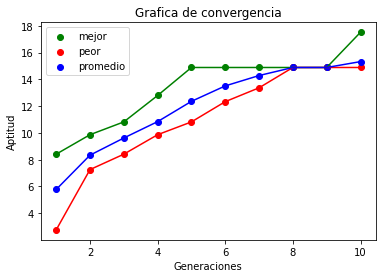

In [ ]:
#parametros de entrada
nVariables = 2
limInf=[0,0]
limSup=[20,20]
# el tamaño de la población debe ser un numero par
tamPoblacion = 6
porcCruza = 0.9
porcMuta = 0.2
generaciones = 10

random.seed(123)
mejores, peores, promedio = algoritmoGenetico(nVariables, limInf, limSup, tamPoblacion, porcCruza, porcMuta, generaciones)
grafica(mejores, peores, promedio, generaciones)

In [ ]:
# chromosome.py
# Created by Miriam Pescador

import random
import math

class Chromosome:
  def __init__(self, n, limInf, limSup):
    self.realValues = [] # variables de decisión, por ejemplo [x1, x2, x3, x4]
    #self.bitstring = []  #  vector codificado, por ejemplo [1110001010011]
    self.fitness = 0
    self.limInf = limInf
    self.limSup = limSup
    self.nvar = n

  def randomInitialize(self):
    self.realValues = []
    for i in range(0, self.nvar):
      self.realValues.append(random.uniform(self.limInf[i], limSup[i]) )

  #funcion para codificar el vector de variables de decisión (decimal a binario)
  def coding(self, x):
    print("Implementa codificación del cromosoma (de decimal a binario)")

	#funcion para decodificar el vector de variables de decisión (binario a decimal)
  def decode(self, bitString):
    print("Implementa decodificación del cromosoma (de binario a decimal)")

  def setFitness(self, value):
    self.fitness = value

  def printChromosome(self):
    print("decision vector")
    for i in range(0, self.nvar):
      print(self.realValues[i])
    print("fx")
    print(self.fitness)

  def evaluateFunction(self, function):
    self.fitness = function(self.realValues[0],self.realValues[1] )


if __name__ == "__main__":
  n = 2
  chrom = Chromosome(n, [0,0], [20,20])
  chrom.randomInitialize()
  chrom.evaluateFunction(fun1)
  chrom.printChromosome()


decision vector
0.9333070900596163
2.0835110647200517
fx
-0.10436392926004512


In [ ]:
# population.py
# Created by Miriam Pescador

class Population:
	def __init__(self, popsize, n, limInf, limSup):
		#Informacion del vector de variables de decision (numero de variables de decision, limite inferior, limite superior)
		self.nvar = n
		self.limInf = limInf
		self.limSup = limSup
		#list of chromosomes [<Chromosome 0x045>, <Chromosome 0x3949>, ...]
		self.population = []
		self.popsize = popsize

	def initializePopulation(self):
		for i in range(0, self.popsize):
			chromosome = Chromosome(self.nvar, self.limInf, self.limSup)
			chromosome.randomInitialize()
			self.population.append(chromosome)

	def printPopulation(self):
		for ind in self.population:
			ind.printChromosome()

	def best(self):
		fitness = -9999999
		index = -1
		for i in range(len(self.population)):
			if fitness < self.population[i].fitness:
				fitness = self.population[i].fitness
				index = i

		return index

	def worst(self):
		fitness = 999999999
		index = -1
		for i in range(len(self.population)):
			if fitness > self.population[i].fitness:
				fitness = self.population[i].fitness
				index = i

		return index


if __name__ == "__main__":
	popsize = 6
	n = 1
	limInf=[-5]
	limSup=[5]
	population = Population(popsize, n, limInf, limSup)
	population.initializePopulation()
	population.printPopulation()





-2.3035771759374613
-3.3117866312705457
2.1822172225247147
3.7092863606526585
2.309928660448046
-0.022107563012104592
